# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [11]:
# TODO: Group by site
#
df['site'] = df['site'].str.lower()
df['site'] = df['site'].str.strip()
df['site'] = df['site'].str.replace('  ', ' ')
df['site'] = df['site'].str.replace('_', ' ')
#group by site and calc mean of age bmi and blood pressure

site_summary = df.groupby('site').agg({'age': 'mean', 'bmi': 'mean', 'systolic_bp': 'mean'})

print(site_summary)

              age        bmi  systolic_bp
site                                     
site a  56.364005  25.875183   117.354284
site b  62.401957  25.706681   117.130675
site c  57.312108  25.789583   117.978359
site d  63.491006  25.565682   117.943662
site e  57.064897  25.476502   117.503080


In [12]:
# TODO: Count by intervention group
df['intervention_group'] = df['intervention_group'].str.lower()
df['intervention_group'] = df['intervention_group'].str.strip()
df['intervention_group'] = df['intervention_group'].str.replace('  ', ' ')
df['intervention_group'] = df['intervention_group'].str.replace('_', ' ')
df['intervention_group'] = df['intervention_group'].str.replace('treatmenta', 'treatment a')
df['intervention_group'] = df['intervention_group'].str.replace('treatmen a', 'treatment a')
df['intervention_group'] = df['intervention_group'].str.replace('contrl', 'control')

intervention_counts = df['intervention_group'].value_counts()
print(intervention_counts)

intervention_group
treatment b    3342
control        3337
treatment a    3321
Name: count, dtype: int64


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [ ]:
# TODO: Use summarize_by_group utility
site_summary_fnc = summarize_by_group(df, 'site', agg_dict={'age': ['mean', 'std'],
                                 'bmi': 'mean', 'systolic_bp': 'mean'})
print(site_summary_fnc)

              age                    bmi systolic_bp
             mean         std       mean        mean
site                                                
site a  56.364005  162.536292  25.875183  117.354284
site b  62.401957  139.050180  25.706681  117.130675
site c  57.312108  157.941868  25.789583  117.978359
site d  63.491006  136.140058  25.565682  117.943662
site e  57.064897  157.697644  25.476502  117.503080


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [14]:
# TODO: Multiple aggregations
site_summary_adv = summarize_by_group(df, 'site', agg_dict={'age': ['mean', 'std', 'min', 'max'],
                                 'bmi': ['mean', 'std'],
                                 'systolic_bp': ['mean', 'median']})
print(site_summary_adv)

              age                              bmi           systolic_bp  \
             mean         std  min  max       mean       std        mean   
site                                                                       
site a  56.364005  162.536292 -999  100  25.875183  4.983102  117.354284   
site b  62.401957  139.050180 -999  100  25.706681  5.017423  117.130675   
site c  57.312108  157.941868 -999  100  25.789583  5.417217  117.978359   
site d  63.491006  136.140058 -999  100  25.565682  5.881319  117.943662   
site e  57.064897  157.697644 -999  100  25.476502  6.084532  117.503080   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  118.0  
site d  118.0  
site e  117.0  


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [34]:
# TODO: Intervention group comparisons
#outcome_cvd is not numeric, cannot get mean of column. Displaying crosstab instead.
outcome_cross = pd.crosstab(df['outcome_cvd'], df['intervention_group'])
display(outcome_cross)
intervention_summary_adv = df.groupby('intervention_group').agg({'adherence_pct': 'mean'})
print(intervention_summary_adv)
drop_cross = pd.crosstab(df['dropout'], df['intervention_group'])
display(drop_cross)



intervention_group,control,treatment a,treatment b
outcome_cvd,,,
No,1532,1599,1570
Yes,617,534,561
no,682,661,657
yes,506,527,554


                    adherence_pct
intervention_group               
control                 60.621688
treatment a             60.210173
treatment b             61.009404


intervention_group,control,treatment a,treatment b
dropout,,,
No,2831,2831,2871
Yes,506,490,471


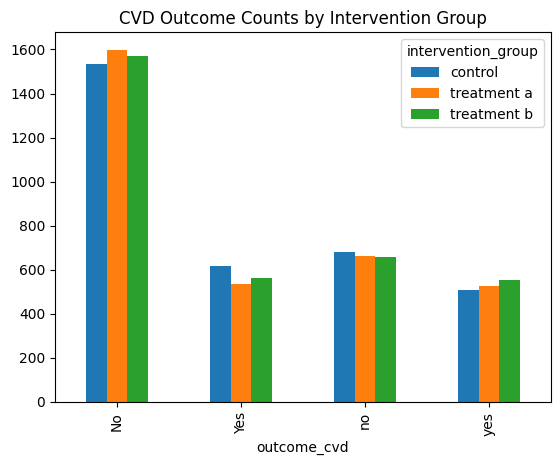

<Figure size 1000x600 with 0 Axes>

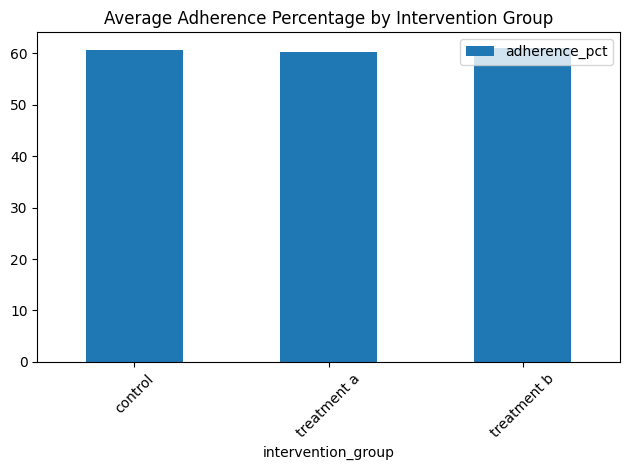

<Axes: title={'center': 'Dropout Counts by Intervention Group'}, xlabel='dropout'>

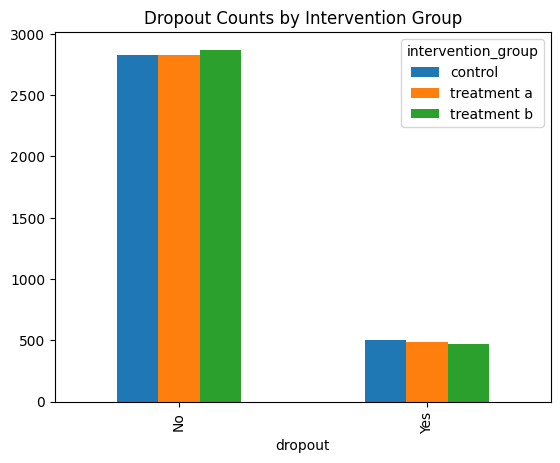

In [35]:
# TODO: Visualization
outcome_cross.plot(kind='bar', title='CVD Outcome Counts by Intervention Group')
plot_group_comparison(intervention_summary_adv.reset_index(), 'intervention_group', 'adherence_pct', 'Average Adherence Percentage by Intervention Group')
drop_cross.plot(kind='bar', title='Dropout Counts by Intervention Group')

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [ ]:
# TODO: Save summary outputs
summary_site_adv.to_csv('output/q7_site_summary.csv')


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. TODO
2. TODO
3. TODO
